### Notebook de autoria de:
* Giane
* Leila
* Maria Gabriela

In [ ]:
#################################################################################################################
###                                                                                                           ###
### ------------------------  PO240 - Fundamentos de Inteligência Artificial ---------------------------------###
###                                                                                                           ###   
### Professora: Ana Carolina Lorena ------------------ 11/Dez/2020 -------------------------------------------###
###                                                                                                           ### 
### Alunas: Leila Abuabara                                                                                    ###
###         Maria Gabriela Valeriano                                                                          ###
###         Giane Amorim Branco Pessoa                                                                        ###
###                                                                                                           ###
#################################################################################################################
###                                                                                                           ###
###      Extracting topics from Brazilian Education discourse: insights to support public policies            ###
###                                                                                                           ###
#################################################################################################################

In [1]:
# instalação de biblioteca necessárias para o processamento
!pip install pytube3
!pip install spacy
!python -m spacy download pt_core_news_sm
!pip install folium
!pip install wordcloud
!pip install youtube-transcript-api
!pip install -U spacy
!pip install --upgrade gensim
!python -m spacy download pt_core_news_sm

#importando um enviroment para lidar com o método Mallet
import os       
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'

     |████████████████████████████████| 21.2MB 1.2MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-cp36-none-any.whl size=21186283 sha256=c67cb8fedb708877b43341f933a2ea17494074e90f46738fa586c9dd198db240
  Stored in directory: /tmp/pip-ephem-wheel-cache-gwd489pb/wheels/ea/94/74/ec9be8418e9231b471be5dc7e1b45dd670019a376a6b5bc1c0
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
     |████████████████████████████████| 10.4MB 5.5MB/s 
     |████████████████████████████████| 1.1MB 42.6MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 24.2MB 1.6MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensi

# Importação de Bibliotecas
Serão utilizadas bibliotecas de análise e processamento de dados gerais

**Dados**
* pandas para manipulação de objetos
* numpy para operações matemáticas

**Extração de base de dados**
* pytube

**Manipulação de textos**

* unicode data
* string
* re
* pt_core_news_sm
* nltk
* spacy
* gensim

**Visualização**
* folium
* matplotlib
* wordcloud

In [4]:
# OS library
from pathlib import Path

# Bibliotecas de dados
import pandas as pd
import numpy as np
import datetime as dt
from itertools import groupby
pd.options.display.max_columns = 100

# Bibliotecas para youtube
from pytube import YouTube
from pytube import Playlist


# Texto
import unicodedata
from string import punctuation
import re
from collections import Counter
import spacy
import pt_core_news_sm
from nltk.stem import RSLPStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
#nltk.download('averaged_perceptron_tagger')
from nltk.stem.snowball import SnowballStemmer
from nltk import tokenize

from gensim.corpora import Dictionary
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet
mallet_path = '/content/mallet-2.0.8/bin/mallet' 

# Visualização
import matplotlib.pyplot as plt
from folium import plugins
import folium
import matplotlib.gridspec as gridspec
from wordcloud import WordCloud
import csv
from math import sqrt

# Magic to reload notebook
%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Obtenção de dados
A primeira etapa do processo de preparação dos dados é a extração.
Utilizaremos a biblioteca pytube, que consegue extrair uma série de informações do YouTube, que é de onde extrairemos as entrevistas nas quais faremos a extração de tópicos.

In [5]:
# extração do link de todos os vídeos da playlist selecionada para análise


playlist = Playlist("https://www.youtube.com/watch?v=3BsIY9RgbJA&list=PLdnZUpbQ9PfmHfqEKnpznqGopkd2cI3Pk&index=5&t=0s")
playlist._video_regex = re.compile(r"\"url\":\"(/watch\?v=[\w-]*)")

links = []
#titulos =[]
print(len(playlist.video_urls))
print(playlist.video_urls)
for url in playlist.video_urls:
    links.append(url)
# print(playlist.title)
    

37
['https://www.youtube.com/watch?v=-VHEGpbNxIY', 'https://www.youtube.com/watch?v=51fN1ncXX4s', 'https://www.youtube.com/watch?v=8b5NaRDr_rY', 'https://www.youtube.com/watch?v=3BsIY9RgbJA', 'https://www.youtube.com/watch?v=ydYx0dfkxSo', 'https://www.youtube.com/watch?v=M3wZnBBMREg', 'https://www.youtube.com/watch?v=xYbtJFXoRnw', 'https://www.youtube.com/watch?v=LiOcLtwHAqI', 'https://www.youtube.com/watch?v=7YM_IN_-zMQ', 'https://www.youtube.com/watch?v=njmxnQ-pbOM', 'https://www.youtube.com/watch?v=6y6nv3nifqM', 'https://www.youtube.com/watch?v=4W8wv0xiAzg', 'https://www.youtube.com/watch?v=6XbEmzBqzhw', 'https://www.youtube.com/watch?v=cwYpplZpxs0', 'https://www.youtube.com/watch?v=nbWuUZgn_vM', 'https://www.youtube.com/watch?v=pdl1dwz0OnI', 'https://www.youtube.com/watch?v=0SEhzvaZKfo', 'https://www.youtube.com/watch?v=nShrMn4nxBs', 'https://www.youtube.com/watch?v=k0nCOxgylVw', 'https://www.youtube.com/watch?v=-zHYXA38DGw', 'https://www.youtube.com/watch?v=SOINCHGkuuM', 'https://

In [6]:
# criando um dataframe vazio para armazenar links e dados
df = pd.DataFrame(columns=['title','link', 'txt_gerado', 'txt_limpo', 'txt_stop', 'txt_lemmas'])

# armazenando a lista de links no dataframe
df['link'] = links
#df['titulos'] = titulos # a extração de textos pela ferramenta falhou, portanto deixamos o código comentado e tentaremos outra estratégia para obtenção

## Extração de legendas de entrevistas


O procedimento funcionou em algumas tentativas, mas depois a biblioteca parou de funcionar. Verificamos também que outros usuários estavam enfrentando o mesmo problema, então fizemos a extração manualmente

In [ ]:
#extrai a legenda gerada automaticamente e escreve em um txt

def extrai_legenda(link_video):
  '''
  extrair a legenda a partir de vídeos do Youtube
  '''
  source = YouTube(link_video) # define a origem do vídeo
  caption = source.captions.get_by_language_code('pt') # define o idioma e obtém a legenda
  caption_convert_to_srt =(caption.generate_srt_captions()) # define as legendas como texto
  return caption_convert_to_srt

df['txt_gerado'] = df['link'].apply(extrai_legenda) # aplica a função para obter a legenda

Com a falha na ferramenta de extração de dados do Youtube, fizemos um trabalho manual de extração de legendas por ferramentas de internet detalhadas no trabalho e armazenamos esses dados em documentos .txt locais.

Para prosseguir com o trabalho, criamos diversas funções para obter o título do arquivo e o armazenar a legenda em um DataFrame.

In [8]:
#extraindo o nome do vídeo do nome do arquivo baixado por ferramenta online

def nome_videos(base_path, fn_filter):
    
    #criando listas vazias para guardar os dados na iteração
    lista = []
    texto = []
    
    for filename in Path(base_path).rglob(fn_filter):
        lista.append(str(filename.name)) #extraindo o nome do arquivo em str para a lista
        abrir = open(filename, 'r', encoding="utf8") # abrindo o arquivo como leitura e com codificação que aceite acentos 
        texto.append(abrir.read()) #lendo o arquivo e armazenando na lista
    return lista, texto

In [ ]:
#definindo o local do arquivo para extrair títulos e conteúdos
base_path = r'\legendas'
filename_filter = "*.txt"

# aplicando a classe nome_videos
df['title'],df['txt_gerado'] = nome_videos(base_path, filename_filter)

In [ ]:
#criando classe para limpar os nomes de arquivos
def corrigir_nomes(nome):
    str(nome)
    nome = nome.replace('_ _ De Olho na Educação [DownSub.com].txt', '').replace('[Portuguese (auto-generated)] ', '').strip()
    return nome

In [ ]:
# convertendo os títulos em string
df['title'] = df['title'].astype(str)
# aplicando a função corrigir_nomes em cada linha do DataFrame
df['title'] = df['title'].apply(corrigir_nomes)

Gravamos o dataset localmente para evitar que novos erros de biblioteca nos impossibilitasse de continuar as análises

Abaixo fazemos a leitura desse arquivo

In [9]:
from google.colab import files

uploaded = files.upload()
df = pd.read_excel('dataset.xlsx')
df.head()

Saving dataset.xlsx to dataset.xlsx


,Unnamed: 0,Unnamed: 0.1,title,link,txt_gerado,txt_limpo,txt_stop,txt_lemmas,tokens,txt_stem
0,0,0,A educação começa em casa,https://www.youtube.com/watch?v=-VHEGpbNxIY,[Música]\n\nolá\n\nde olho na educação está co...,olá de olho na educação está começando este é ...,olá olho educação começando programa rede emis...,olá olhar educação começar programar redar emi...,"['olá', 'de', 'olhar', 'o', 'educação', 'estar...",olá olh educ começ program red emis públic edu...
1,1,1,A Educação como prioridade _ De Olho na Educaç...,https://www.youtube.com/watch?v=51fN1ncXX4s,[Música]\n\n[Música]\n\nolá\n\nde olho na educ...,olá de olho na educação está começando este pr...,olá olho educação começando programa compromis...,olá olhar educação começar programar compromis...,"['olá', 'de', 'olhar', 'o', 'educação', 'estar...",olá olh educ começ program compromiss red emis...
2,2,2,A importância da nova Base Nacional Comum Curr...,https://www.youtube.com/watch?v=8b5NaRDr_rY,[Música]\n\nolá\n\nde olho na educação está co...,olá de olho na educação está começando este pr...,olá olho educação começando programa compromis...,olá olhar educação começar programar compromis...,"['olá', 'de', 'olhar', 'o', 'educação', 'estar...",olá olh educ começ program compromiss red emis...
3,3,3,A reforma do Ensino Médio irá mudar o cenário ...,https://www.youtube.com/watch?v=3BsIY9RgbJA,[Música]\n\nolá\n\nde olho na educação está co...,olá de olho na educação está começando este pr...,olá olho educação começando programa compromis...,olá olhar educação começar programar compromis...,"['olá', 'de', 'olhar', 'o', 'educação', 'estar...",olá olh educ começ program compromiss red emis...
4,4,4,Alfabetização no Brasil_ o que melhorar,https://www.youtube.com/watch?v=ydYx0dfkxSo,[Música]\n\nolá\n\nde olho na educação está co...,olá de olho na educação está começando um comp...,olá olho educação começando compromisso rede e...,olá olhar educação começar compromisso redar e...,"['olá', 'de', 'olhar', 'o', 'educação', 'estar...",olá olh educ começ compromiss red emis públic ...


## Limpeza de dados
Nessa etapa estamos removendo textos que não são úteis para a análise, como marcações de acessibilidade de legenda, marcadores de tempo correspondente à legenda e outros marcadores que vem por padrão em legendas extraídas do Youtube

In [10]:
def limpar_tempos(texto):
  '''
  a função retorna texto livre de caracteres estranhos, para devolver um texto livre e corrido.
  texto (str): texto de entrada
  '''
  # remoção de caracteres
  texto = texto.replace('[Música]','') 
  texto = re.sub('[0123456789->:,ºª]', '', texto).lstrip()
  texto = re.sub('\n', ' ', texto)
  texto = texto.replace('  ', ' ')

  return texto

# aplica a função limpar_tempos a cada linha do DataFrame e armazena em uma coluna
df['txt_limpo'] = df['txt_gerado'].apply(limpar_tempos)


# Pré-processamento
nessa etapa aplicaremos diversos tratamentos de dados, incluindo:
* remoção de stopwords, ou seja, das palavras que não agregam no contexto e se repetem com muita frequência
* lemmatização e stemmização - dois tratamentos distintos de redução de palavras
* criação de tokens para aplicação de técnicas de categorização de palavras

In [29]:
def remocao_stopwords(texto):
    '''
    exclui stopwords
    '''
    #nltk.download('stopwords') # obtem a lista padrão da biblioteca para a lingua portuguesa
    stopwords = nltk.corpus.stopwords.words('portuguese') + ['ir', 'lá', 'mil','aí', 'cento', 'paulo', 'cada', 'onde','dois', 'três', 'maria',
                       'nado' 'área', 'usar', 'vezar', 'fato', 'vir', '%','aqui', 'falar', 'ainda','agora', 'dessa', 'desse', 'disso',
                       'outro','saber', 'querer', 'olhar', 'muito', 'assim', 'dessar', 'ea', 'fazer', 'ter', 'outro', 'outra', 'outras', 'outros',
                       'dizer', 'todo', 'gente', 'então', 'dar', 'ano', 'porque', 'ser', 'achar', 'né', 'pra',
                       'ver', 'algum', 'coisa', 'ficar', 'estar', 'achar', 'acha', 'acho', 'ter', 'querer', 'quero', 'dizer', 'ficar']
    # adiciona outras palavras que não estão na lista e tem muitas ocorrências e não agregam contexto
    texto = texto.split()
    resultwords  = [word for word in texto if word.lower() not in stopwords] # executa a remoção das palavras
    result = ' '.join(resultwords) # aplica um espaço entre as palavras removidas
    #print(stopwords)
    return result

# aplica a classe de remoção de stopwords
df['txt_stop']= df['txt_limpo'].apply(remocao_stopwords)


SyntaxError: ignored

In [ ]:
# Busca apenas a raiz das palavras
stemmer = RSLPStemmer()
# Aplicando objeto
func = lambda x: " ".join([stemmer.stem(word) for word in str(x).split()]) # função para extração do stemma da palavra
df['txt_stem'] = df['txt_stop'].apply(func)

In [35]:
def lemmatizacao(texto):
  '''
  aplica lemmatização no texto de entrada
  '''
  nlp = pt_core_news_sm.load() # obtem o conteúdo da lemmatização para a lingua portuguesa
  doc = nlp(texto)
  result = (" ".join([token.lemma_ for token in doc])) #aplica  ao conteúdo de texto
  # corrige alguns erros da lemmatização automática
  result = result.replace('estudante', 'aluno')
  result = result.replace('alunar', 'aluno')
  result = result.replace('professorar', 'professor')
  result = result.replace('livrar', 'livro')
  result = result.replace('redar', 'rede')
  result = result.replace('programar', 'programa')
  result = result.replace('vezar', 'vez')
  result = result.replace('casar', 'casa')
  result = result.replace('vidar', 'vida')
  result = result.replace('pontar', 'ponta')
  return result

df['txt_lemmas'] = df.txt_stop.apply(lemmatizacao)

In [45]:
#criando tokens - sem repetição de palavras

from nltk.util import ngrams

def tokenize_ngrams(x,stopwords:list=None,ngram:int=1):
    """
    Função que realiza a criação de tokens para os comentários.
    """
    # Criando tokens
    token = nltk.word_tokenize(x)
    stopwords = nltk.corpus.stopwords.words('portuguese') + ['ir', 'lá', 'mil','aí', 'cento', 'paulo', 'cada', 'onde','dois', 'três', 'maria',
                       'nado' 'área', 'usar', 'vezar', 'fato', 'vir', '%','aqui', 'falar', 'ainda','agora', 'dessa', 'desse', 'disso',
                       'outro','saber', 'querer', 'olhar', 'muito', 'assim', 'dessar', 'ea', 'fazer', 'ter', 'outro', 'outra', 'outras', 'outros',
                       'dizer', 'todo', 'gente', 'então', 'dar', 'ano', 'porque', 'ser', 'achar', 'né', 'pra',
                       'ver', 'algum', 'coisa', 'ficar', 'estar', 'achar', 'acha', 'acho', 'ter', 'querer', 'quero', 'dizer', 'ficar']
    # Caso exista lista de stopwords, então não é criado o token
    if stopwords is not None:
        token = [palavra for palavra in token if palavra not in stopwords]
    # Verificando qual ngram
    # Se for unigram, não precisa de espaço
    if ngram==1:
        return [''.join(val) for val in ngrams(token, ngram)]
    # Se for bi, trigram, necessita de espaço entre palavras
    else:
        return [' '.join(val) for val in ngrams(token, ngram)]

In [48]:
# Criando tokens
#func = lambda x:tokenize_ngrams(x,ngram=1)
df['tokens'] = df['txt_lemmas'].apply(tokenize_ngrams)

func = lambda x:tokenize_ngrams(x,ngram=2)
df['tokens_bigram'] = df['txt_lemmas'].apply(func)

trig = lambda x:tokenize_ngrams(x,ngram=3)
df['tokens_trigram'] = df['txt_lemmas'].apply(trig)

Salvamos novamente o Dataframe resultante das etapas em um formato de fácil acesso

In [49]:
df.to_excel('dataset.xlsx')
from google.colab import files
files.download( "dataset.xlsx" )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Extração de tópicos
Para essa etapa utilizaremos a biblioteca gensim, com auxílio de sklearn e o CountVetorizer para treino

Configuramos os bigrams e trigrams para análises posteriores

In [ ]:
# configurando bigrams e trigrams

import gensim
from gensim.models import Phrases
# criação de bigram
bigram = gensim.models.Phrases(df.txt_lemmas, min_count=1, threshold=1) 
bigram_mod = gensim.models.phrases.Phraser(bigram)

#criação de trigram
trigram = gensim.models.Phrases(bigram[df.txt_lemmas], threshold=1)
trigram_mod = gensim.models.phrases.Phraser(trigram)

Através da bag of words obtemos as palavras mais frequêntes

In [50]:
# obtendo as palavras mais frequentes
from sklearn.feature_extraction.text import CountVectorizer
def palavras_mais_frenquentes(str, n=None):
    '''
    obtendo as palavras mais frequentes
    '''
    vect = CountVectorizer().fit(str) # criando um vetor e fazendo o fit no modelo
    bag_of_words = vect.transform(str) # criando o bag of words
    sum_words = bag_of_words.sum(axis=0) # somando as palavras iguais
    # verificando a frequencia das palavras
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]
  
palavras_mais_frenquentes(df.txt_lemmas,100)

[('escola', 738),
 ('educação', 702),
 ('ir', 666),
 ('aluno', 644),
 ('professor', 630),
 ('ensinar', 621),
 ('poder', 435),
 ('criança', 431),
 ('fazer', 344),
 ('todo', 284),
 ('trabalhar', 257),
 ('país', 254),
 ('brasil', 251),
 ('público', 247),
 ('ano', 242),
 ('ter', 227),
 ('bom', 216),
 ('médio', 213),
 ('hoje', 206),
 ('olhar', 205),
 ('importante', 199),
 ('formação', 199),
 ('aprender', 196),
 ('aula', 185),
 ('dar', 184),
 ('base', 184),
 ('outro', 183),
 ('pessoa', 173),
 ('exemplo', 172),
 ('preciso', 171),
 ('problema', 167),
 ('algum', 164),
 ('nacional', 164),
 ('muito', 162),
 ('pouco', 161),
 ('noite', 159),
 ('querer', 155),
 ('rede', 154),
 ('bem', 153),
 ('mundo', 153),
 ('saber', 153),
 ('programa', 150),
 ('formar', 146),
 ('questão', 146),
 ('fundamental', 145),
 ('grande', 144),
 ('dizer', 142),
 ('conseguir', 142),
 ('passar', 140),
 ('vez', 134),
 ('ficar', 132),
 ('brasileiro', 132),
 ('estudar', 129),
 ('primeiro', 129),
 ('precisar', 128),
 ('melhorar',

Através do ldaMallet construímos a primeira aproximação, para conseguir definir a quantidade de tópicos que será utilizada

Text(0, 0.5, 'Coherence Score')

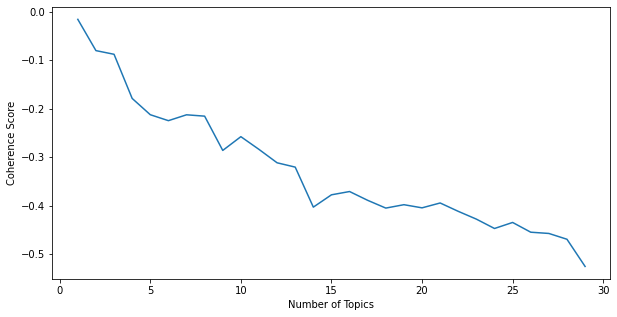

In [53]:
import gensim

dataset = [d.split() for d in df.txt_lemmas]
dictionary = corpora.Dictionary(dataset)

# constrói o vetor de corpus com o número de ocorrências de cada palavra
corpus = [dictionary.doc2bow(word.split()) for word in df.txt_lemmas]

#cria uma lista vazia para armazenar os valores de coerência
coherence = []
# cálculo da coerência
for nb_topics in range(1,30):
    # define o ldamallet 
    ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=nb_topics, id2word=dictionary)
    # empacota o modelo pelo gensim
    gensimmodel = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)
    # efetua o treino com os parâmetros definidos
    cohm = CoherenceModel(model=gensimmodel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    # obtem a coerência
    coh = cohm.get_coherence()
    # grava o valor na lista
    coherence.append(coh)

                                         
# configura o plt para plotar o gráfico de coerência x número de tópicos
plt.figure(figsize=(10,5))
plt.plot(range(1,30), coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")

Performamos mais um teste para verificar como evolui a coerência a cada quantidade de tópicos

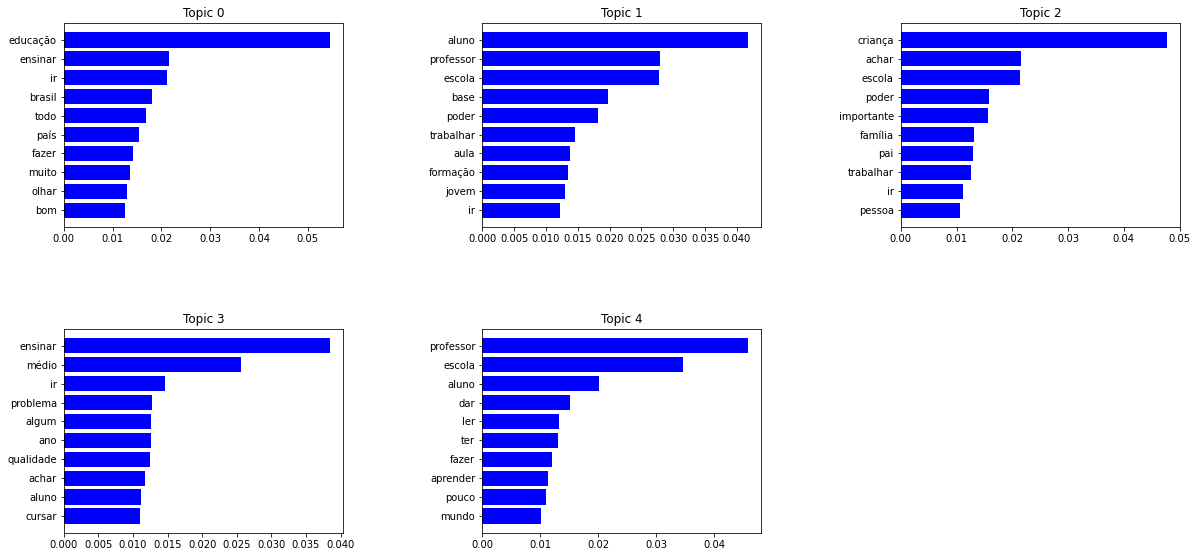

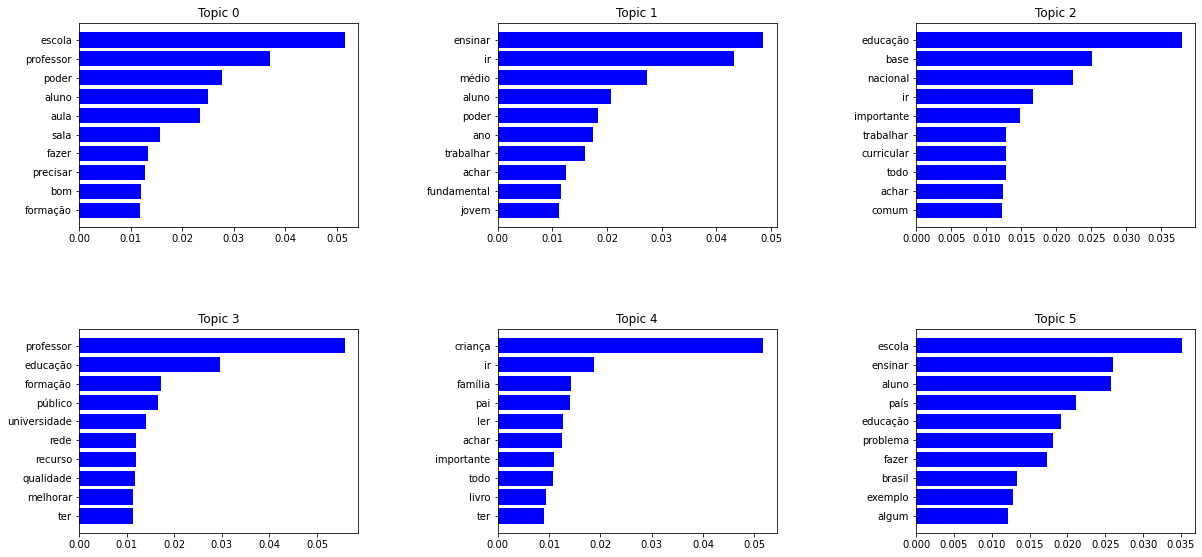

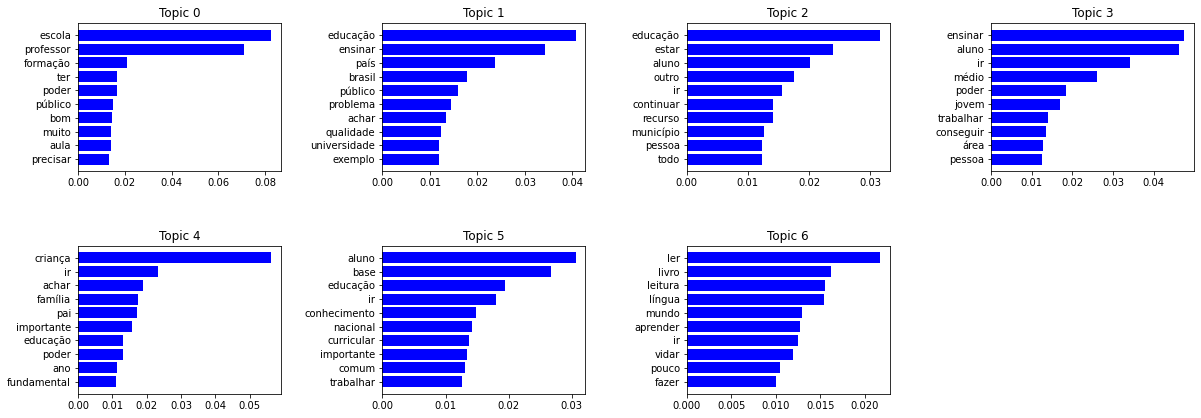

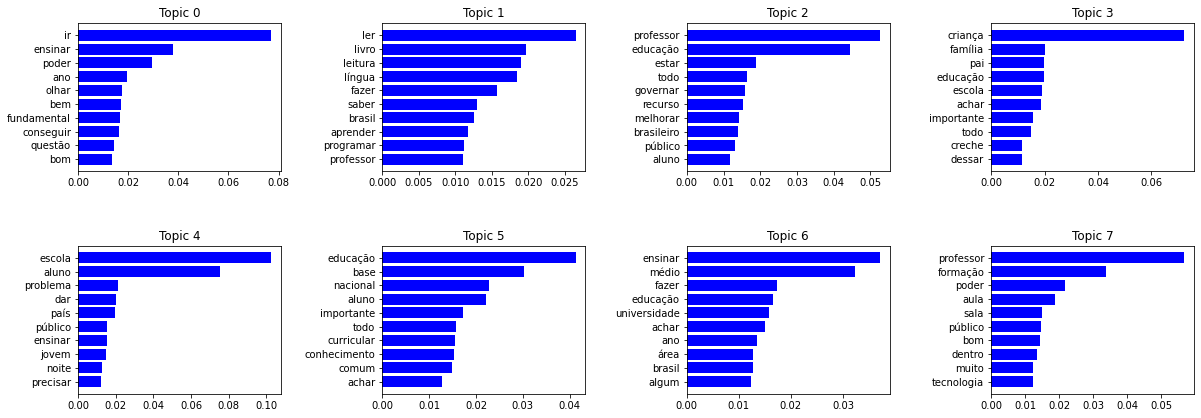

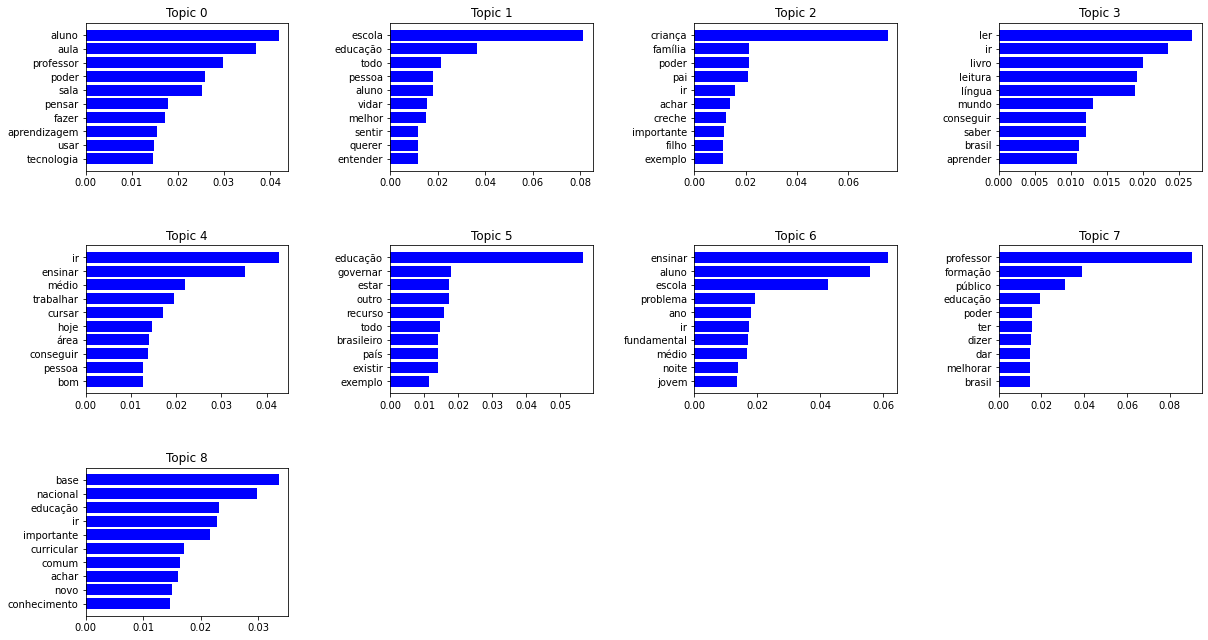

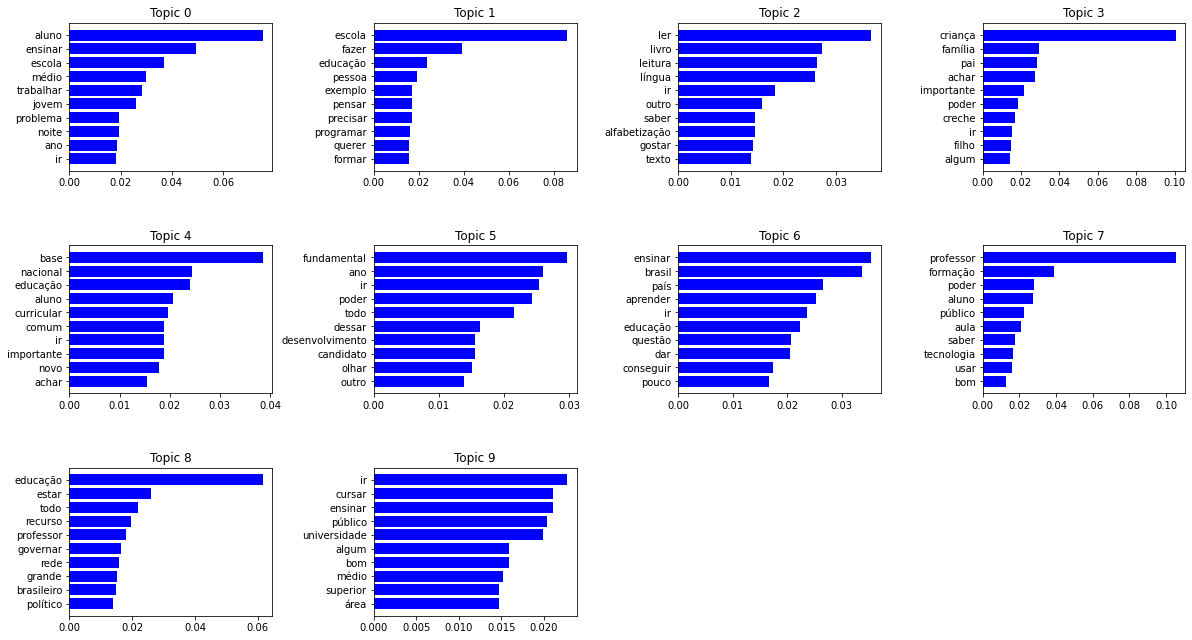

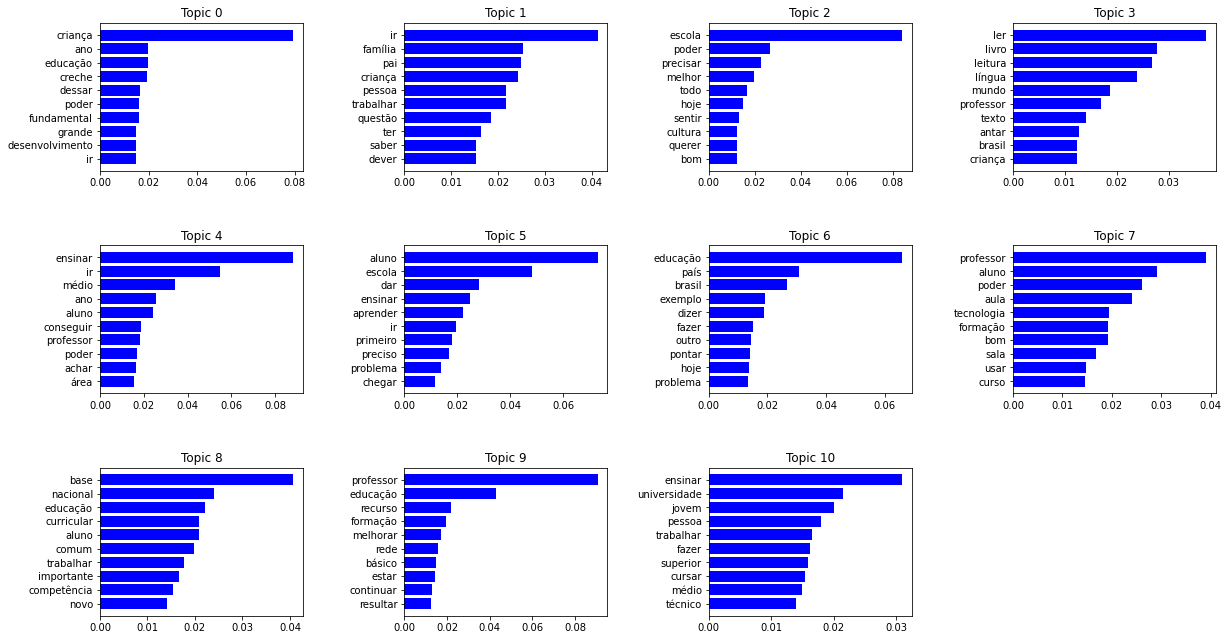

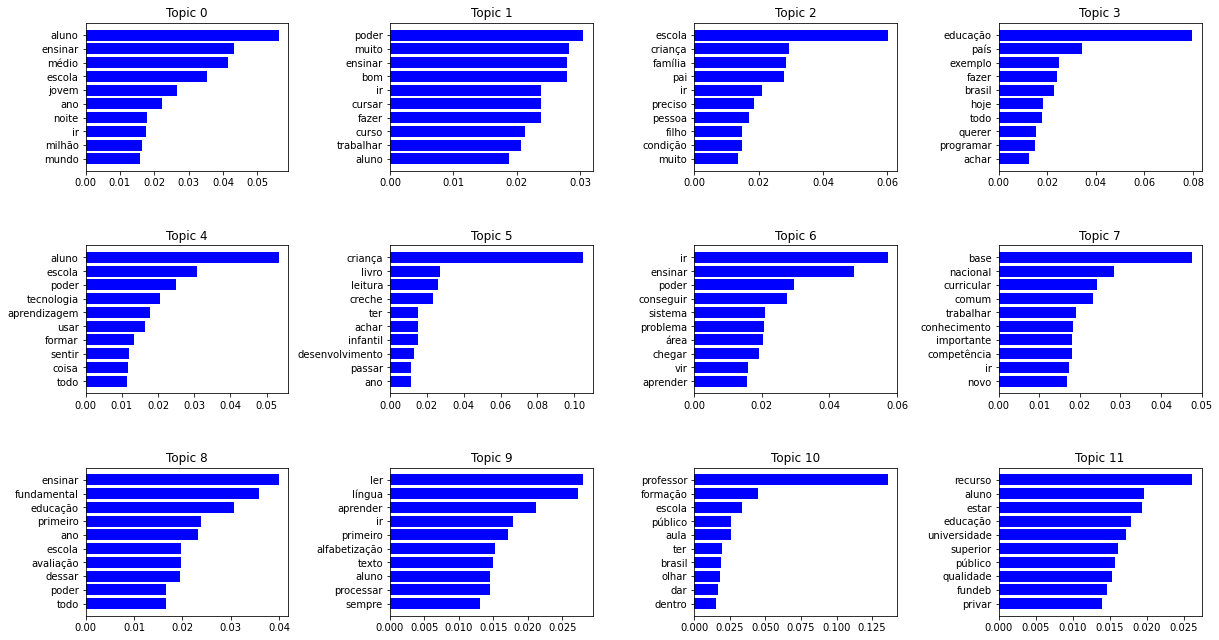

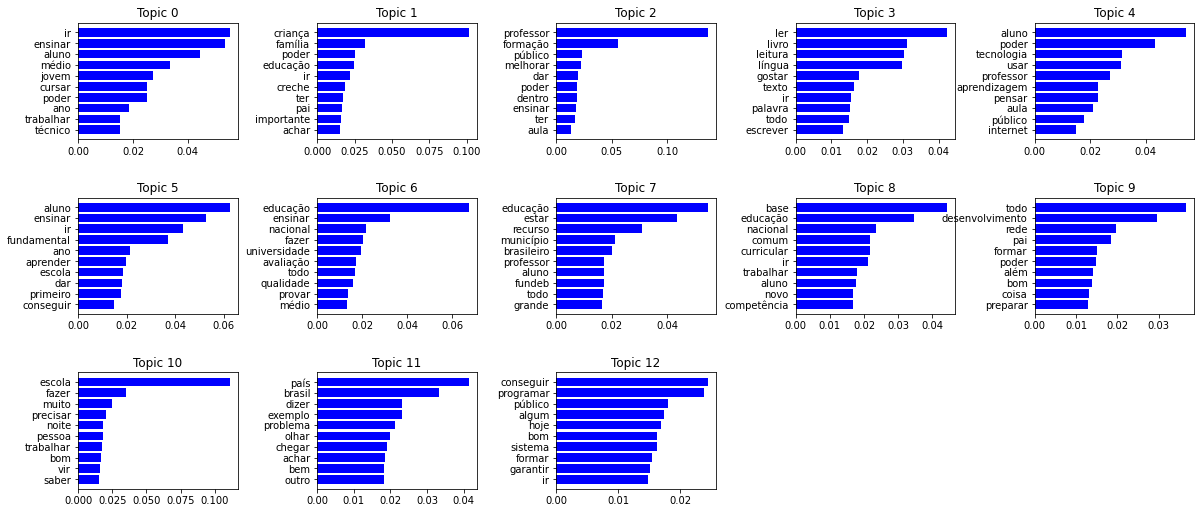

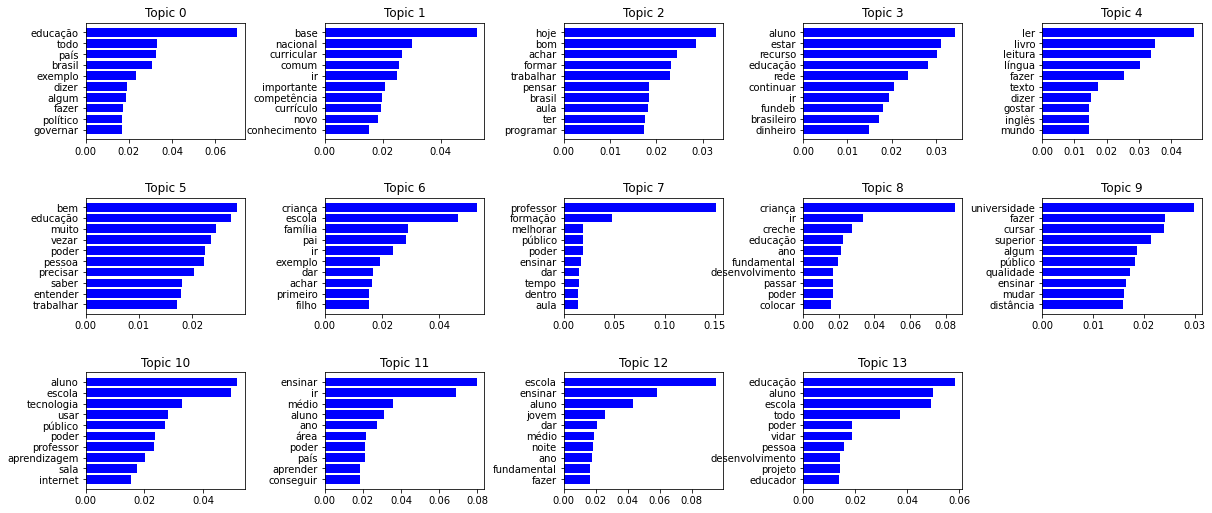

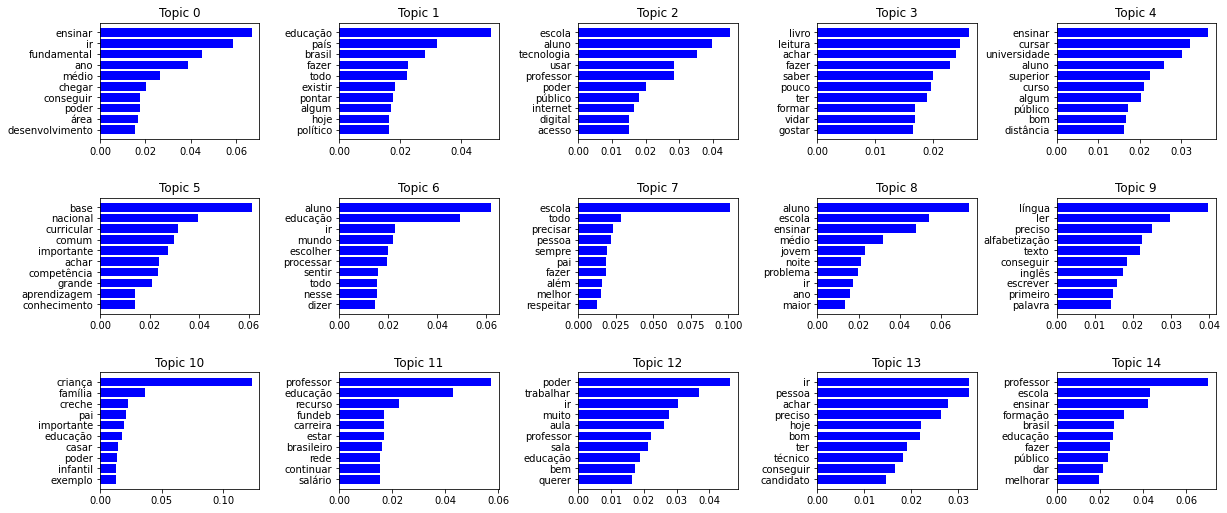

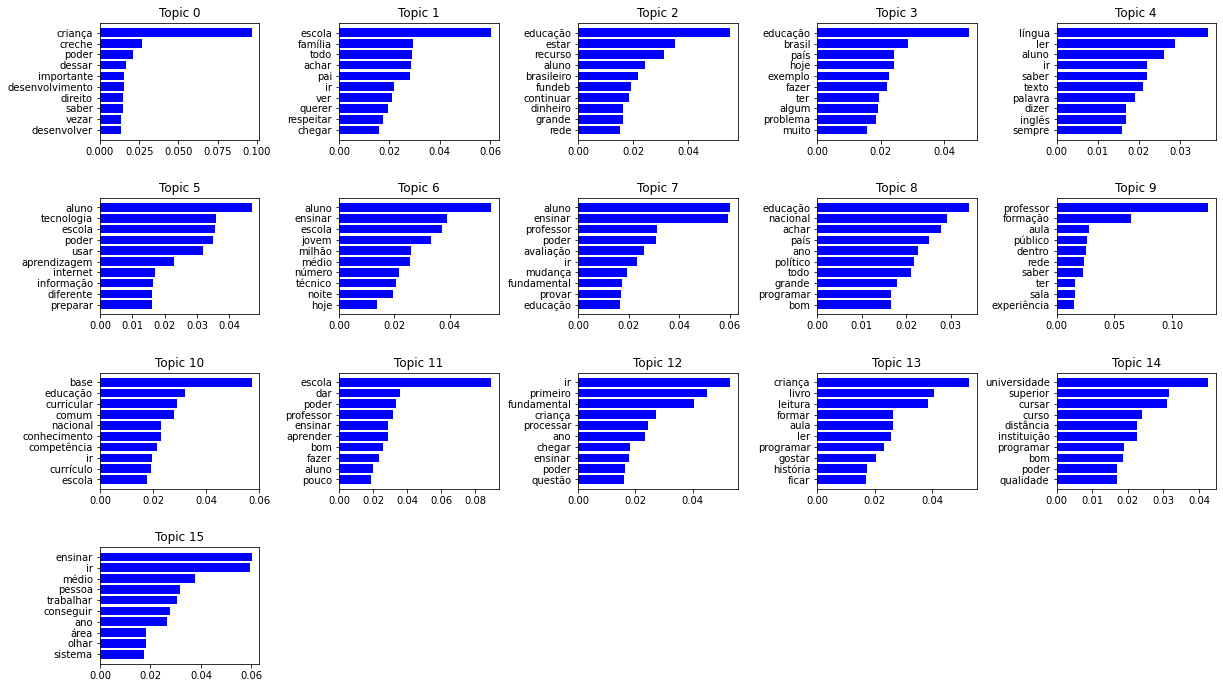

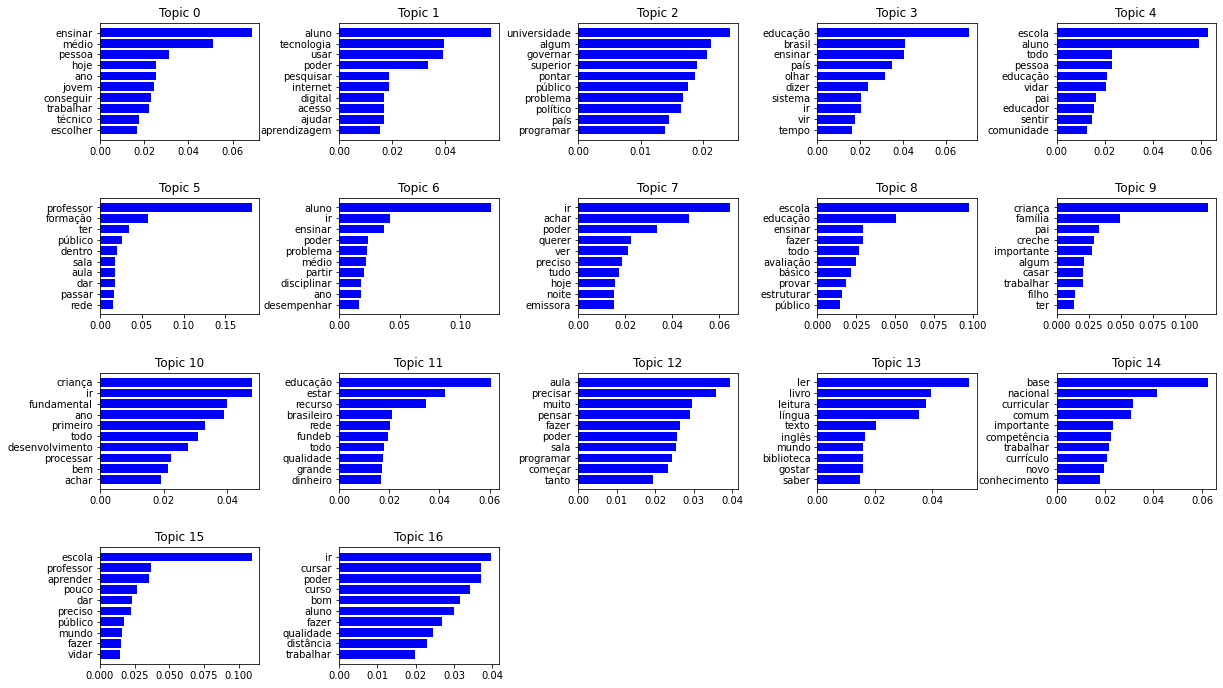

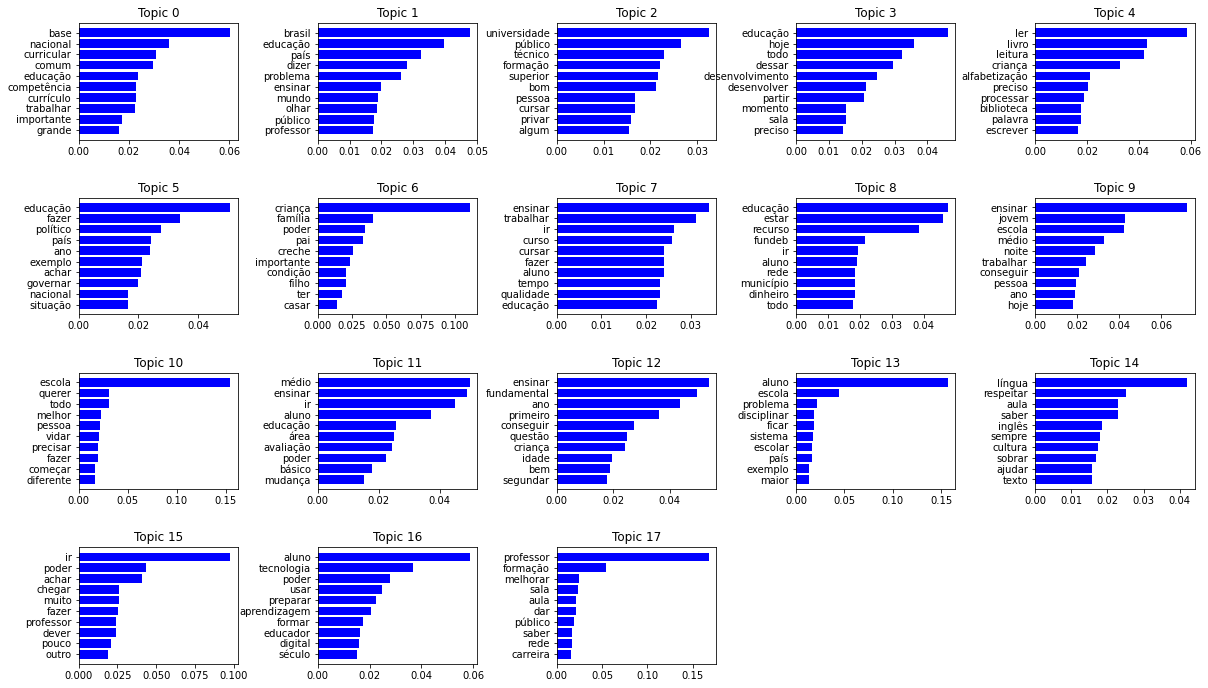

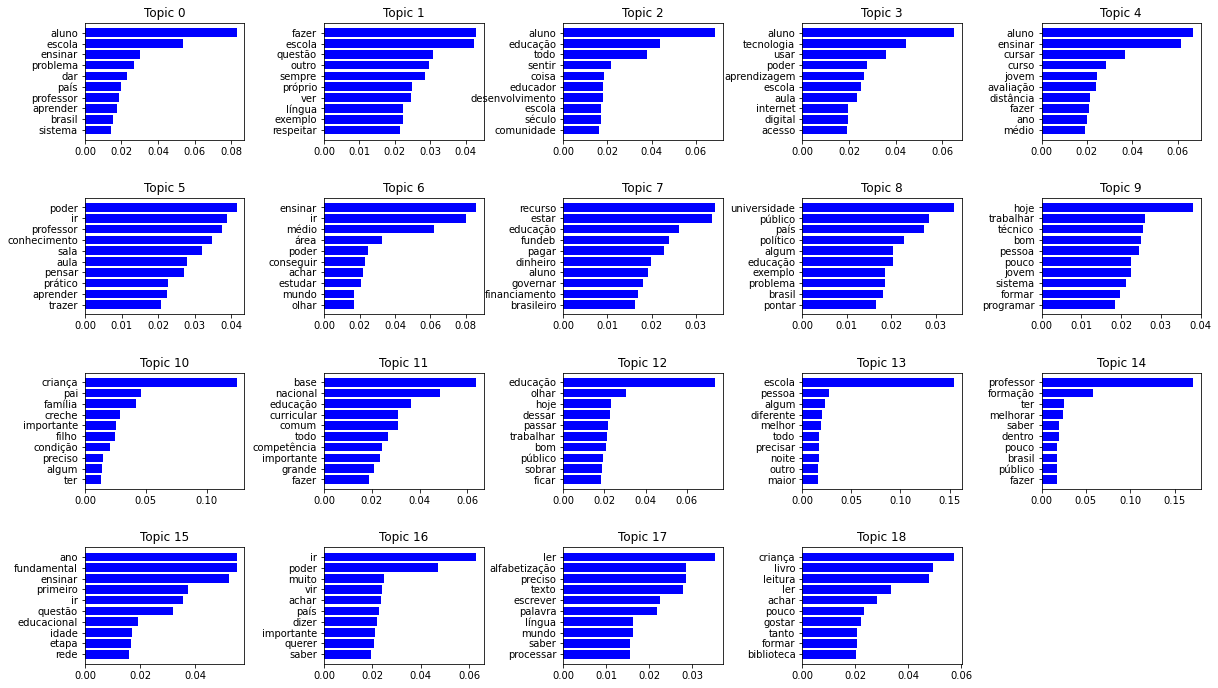

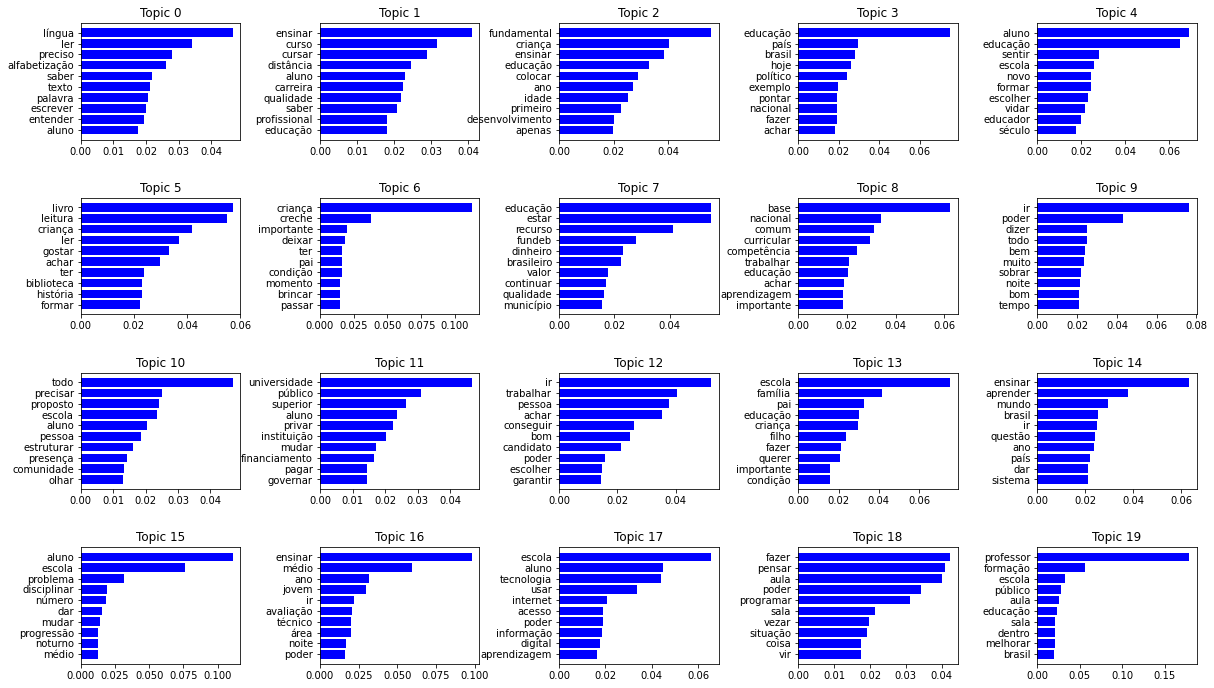

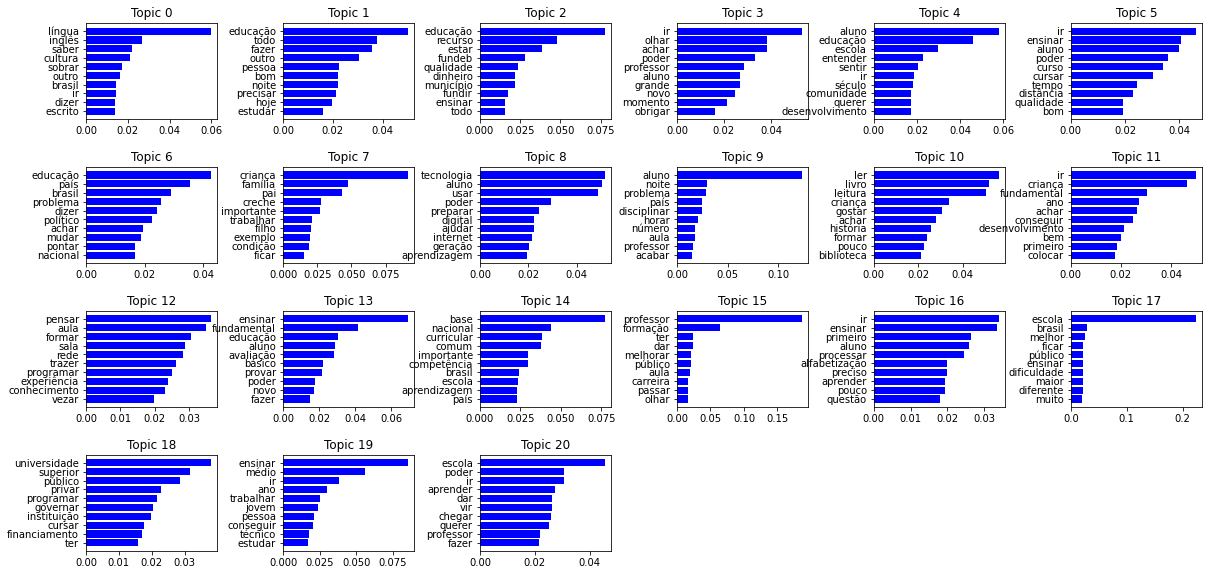

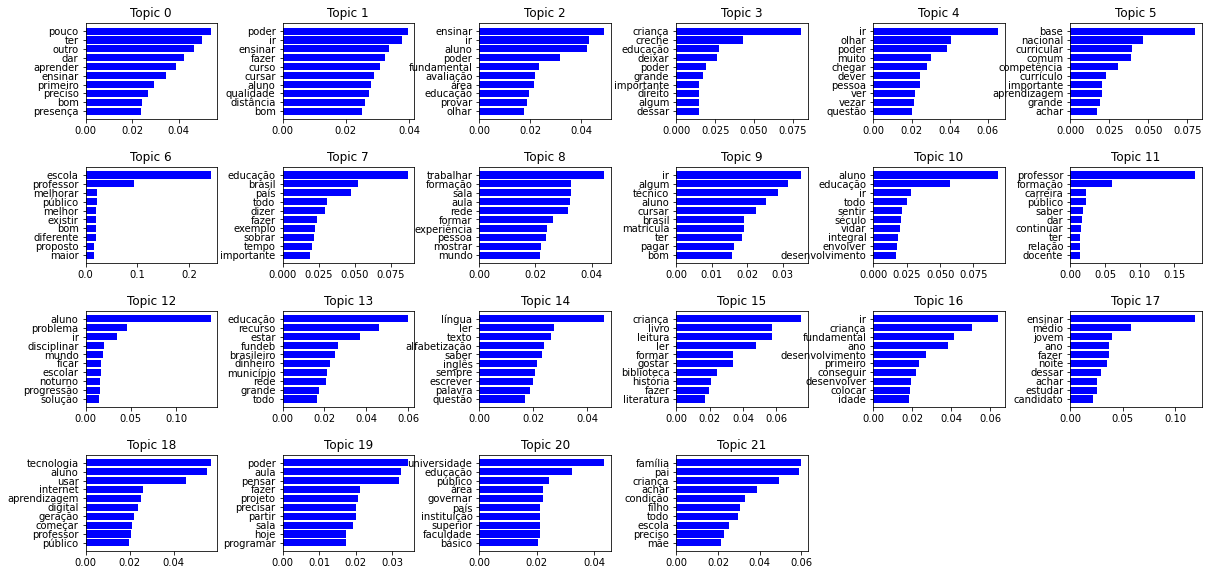

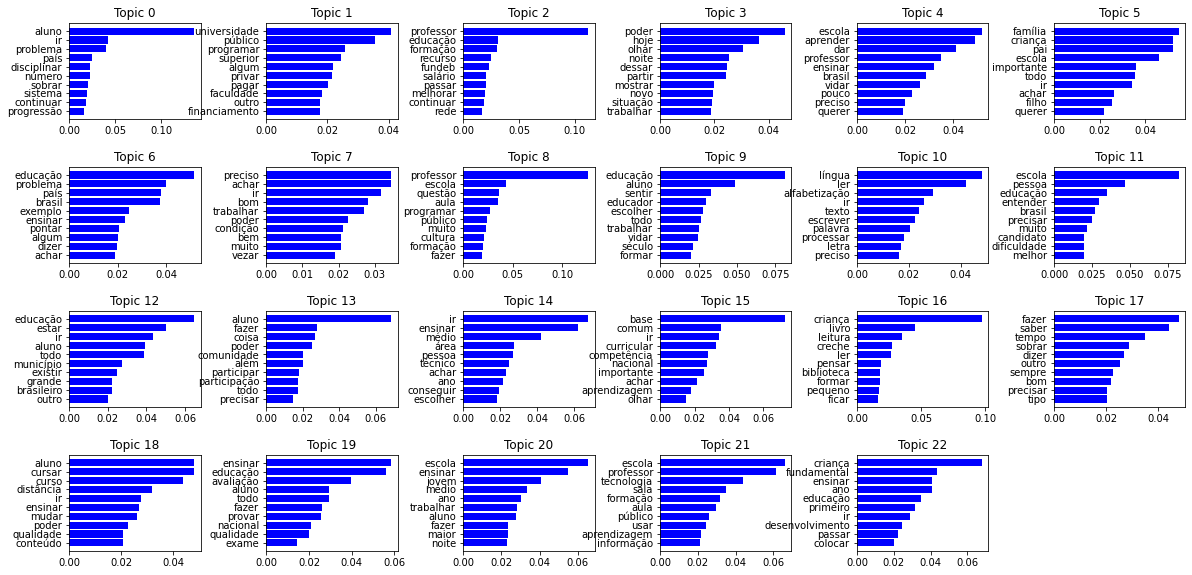

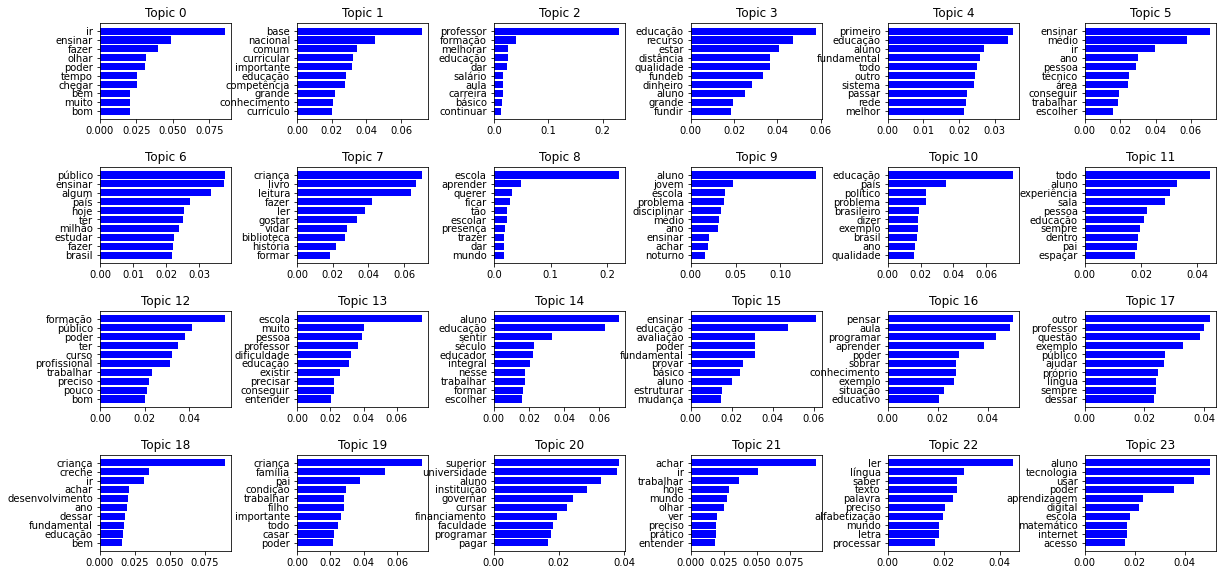

In [ ]:
for x in range(5,25): 
  ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=x, id2word=dictionary)
  lda = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

  def plot_top_words(lda=lda,nb_topics=x,nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(sqrt(x))+1,round(sqrt(x))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))

  plot_top_words()

# Visualização de resultados

Com a quantidade de tópicos definida, imprimimos o tópicos propriamente, utilizando uma visualização gráfica com barras

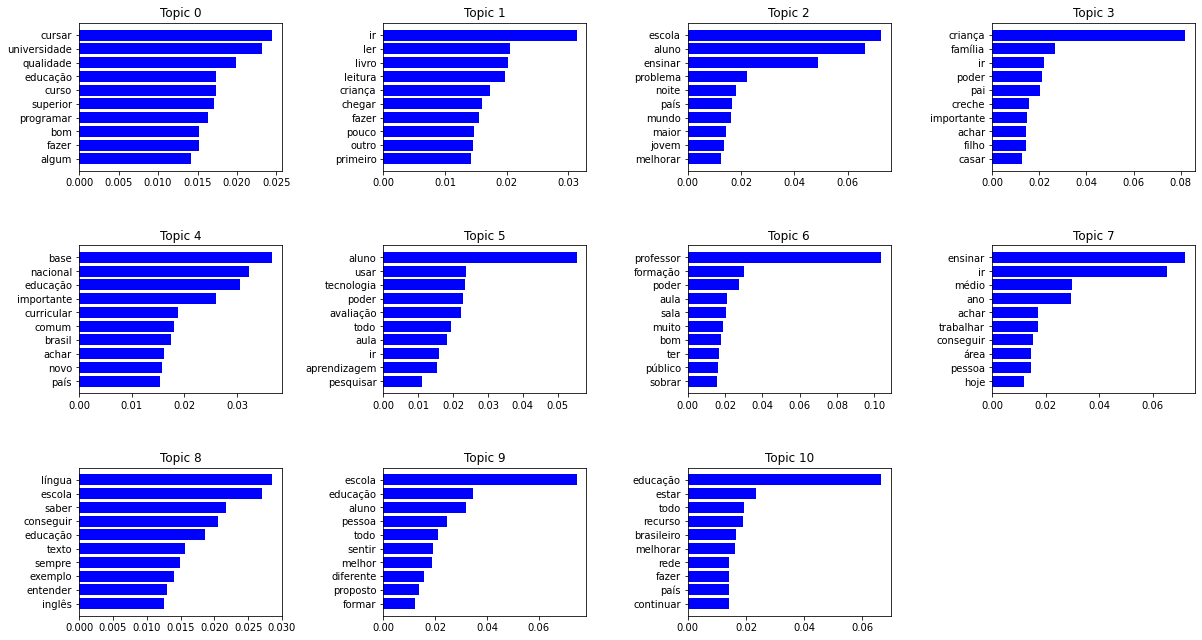

In [ ]:
k = 11

ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=k, id2word=dictionary)
lda = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

def plot_top_words(lda=lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(sqrt(k))+1,round(sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))
        
plot_top_words()

Com o número de tópicos definidos, extraímos os principais em uma nuvem de palavras

['professor formação público escola aula sala ter rede muito dar olhar dentro saber poder melhorar pouco experiência questão continuar básico carreira dessar estadual separar bom obrigar prático ir ficar vário vez gostar melhor educador preciso profissional dez além sempre municipal apoiar docente tudo menos relação salário passar votar teoria função', 'escola aluno ensinar médio jovem noite hoje milhão ano trabalhar fazer ter estudar técnico menos dar mundo problema desempenhar dia número preciso possibilidade quase algum maior população ficar disciplinar ir período público escolar oportunidade noturno aula nível acabar tentar existir maioria progressão principalmente nessa dois perder pensar mesmo matrícula inteirar', 'ensinar poder ir aluno cursar área fazer qualidade médio bom avaliação curso educação distância provar mudança universidade buscar oferecer modelar ministério disciplinar mudar superior hoje acontecer tempo cincar apenas enem conteúdo instituição ano último trabalhar i

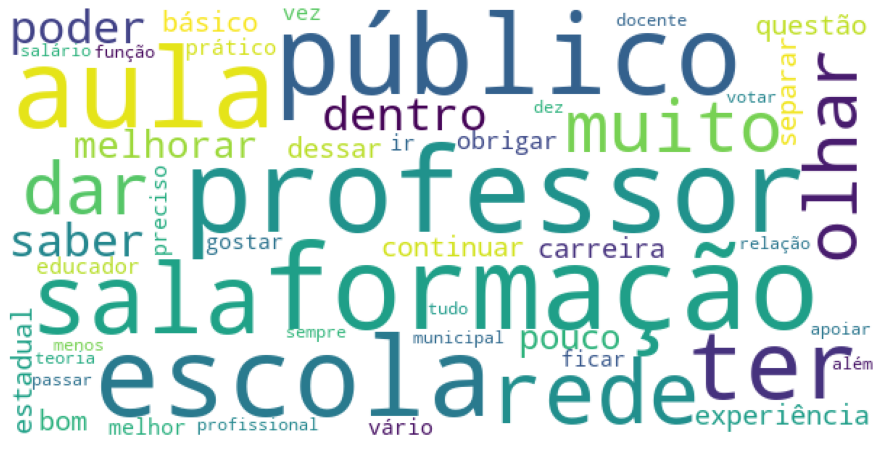

In [61]:
lis_word = [' '.join(w) for w in top_words]
print(lis_word)
wordcloud = WordCloud(max_font_size=80, max_words=100, width=600,height=300, background_color="white").generate(lis_word[0])

fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file('nuvem_topicos.png')

E fazemos também nuvens complementares, compreendendo outras opções de interpretação

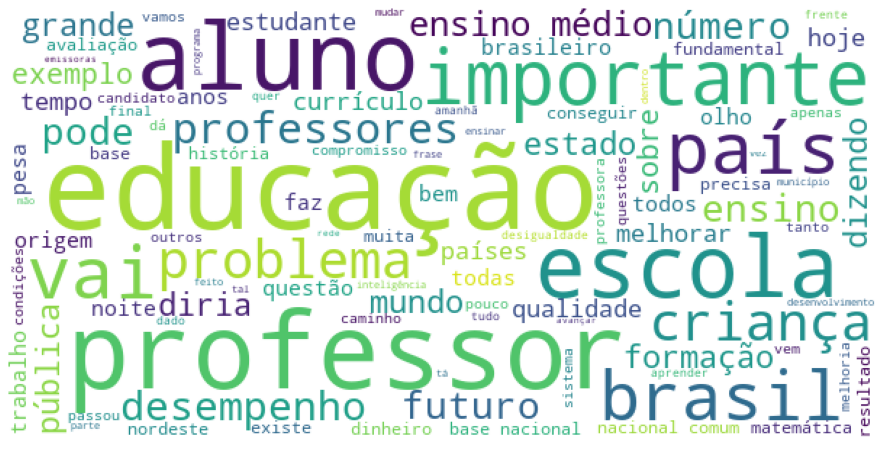

In [ ]:
from wordcloud import WordCloud
lista = []
for w in df.txt_stop:
  lista = [''.join(w)]
  #lista = str(lista)
wordcloud = WordCloud(max_font_size=80, max_words=100, width=600,                            
                      height=300, background_color="white").generate(lista[0])

fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file('nuvem_educação.png')

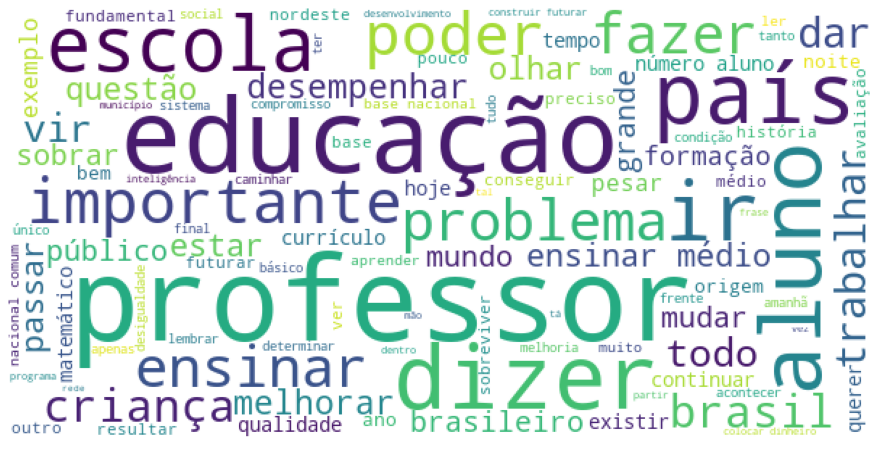

In [74]:
lista = []
for w in df.txt_lemmas:
  lista = [''.join(w)]

wordcloud = WordCloud(max_font_size=80, max_words=100, width=600, height=300, background_color="white").generate(lista[0])

fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file('nuvem_educação.png')

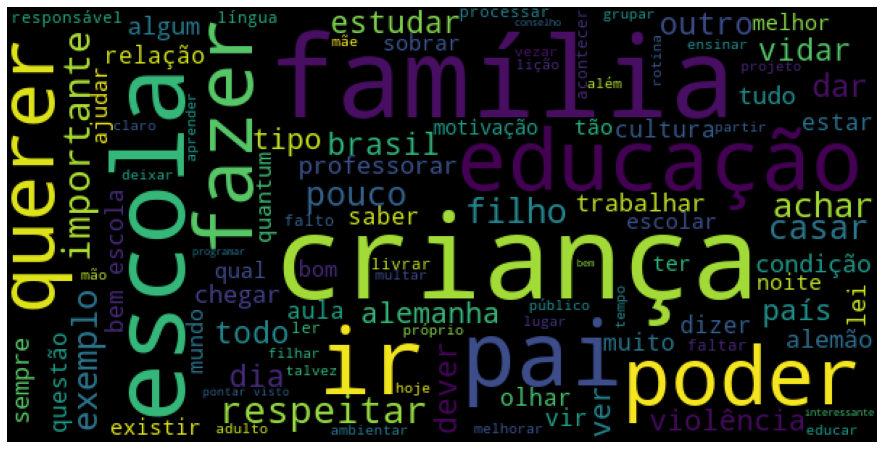

In [ ]:
# visualização incluindo trigrams
tri = [''.join(w) for w in trigram_mod[df.txt_lemmas]]
  

wordcloud = WordCloud(max_font_size=80, max_words=100, width=600,                            
                      height=300, background_color="black").generate(tri[0])

fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file('nuvem_educação.png')